In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [91]:
def print_img(img, nome=None):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    
    if nome is not None:
        plt.title(nome)
    
    plt.show()

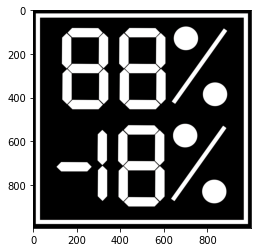

In [52]:
base = cv.imread("Mostrador_base.png")
print_img(base)

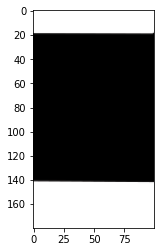

In [53]:
print_img(base[270:450,200:300])

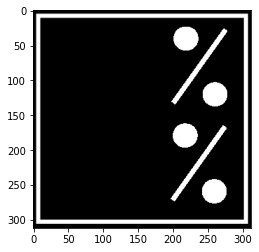

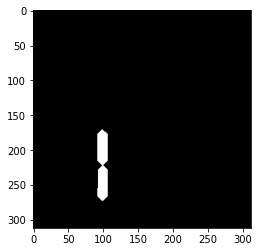

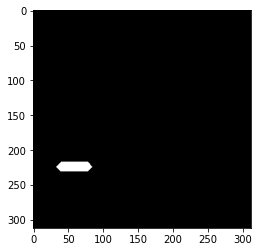

In [79]:
frame = cv.imread("Camadas/Camada-1.png")
porcentagem = cv.imread("Camadas/Porcentagem1.png")
porcentagem2 = cv.imread("Camadas/Porcentagem2.png")
frame += porcentagem+porcentagem2

numero4 = cv.imread("Camadas/N41.png")+cv.imread("Camadas/N42.png")
menos = cv.imread("Camadas/Menos.png")

print_img(frame)
print_img(numero4)
print_img(menos)

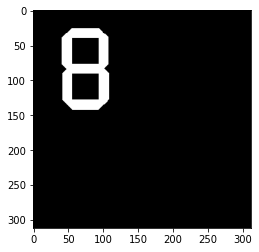

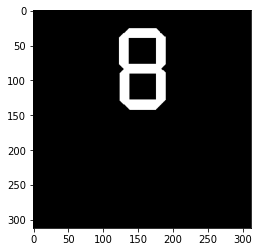

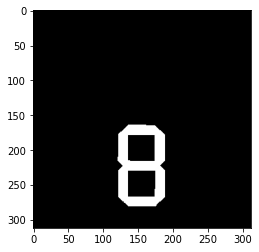

In [88]:
numero1 = []
numero1_cheio = np.zeros_like(frame)

for i in range(16,23):
    path = "Camadas/Layer-"+str(i)+".png"
    numero1.append(cv.imread(path))
    numero1_cheio += numero1[i-16]

print_img(numero1_cheio)

numero2 = []
numero2_cheio = np.zeros_like(frame)

for i in range(23,30):
    path = "Camadas/Layer-"+str(i)+".png"
    numero2.append(cv.imread(path))
    numero2_cheio += numero2[i-23]

print_img(numero2_cheio)

numero3 = []
numero3_cheio = np.zeros_like(frame)

for i in range(9,16):
    path = "Camadas/Layer-"+str(i)+".png"
    numero3.append(cv.imread(path))
    numero3_cheio += numero3[i-9]

print_img(numero3_cheio)

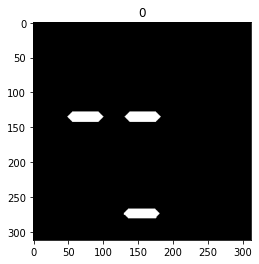

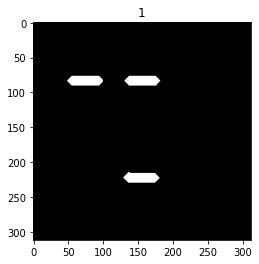

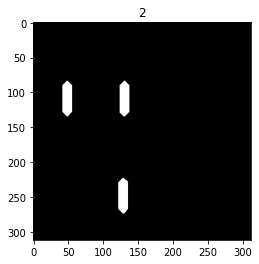

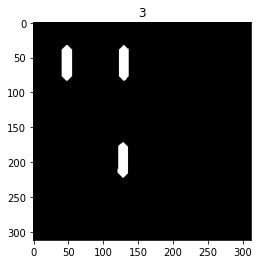

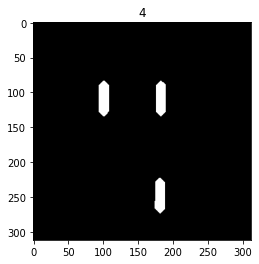

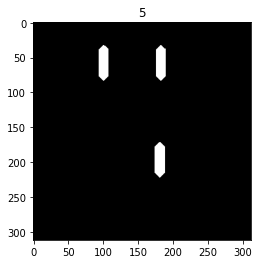

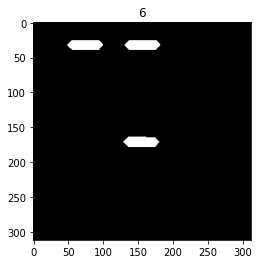

In [93]:
for i in range(7):
    teste = numero1[i]+numero2[i]+numero3[i]
    print_img(teste, str(i))

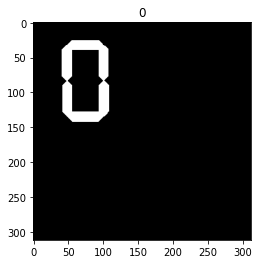

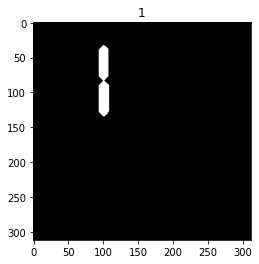

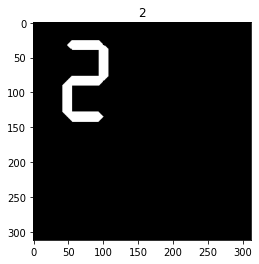

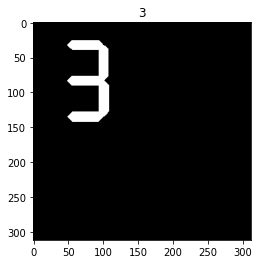

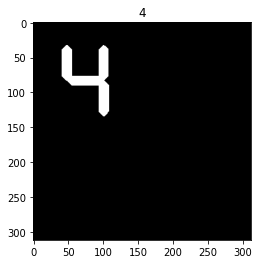

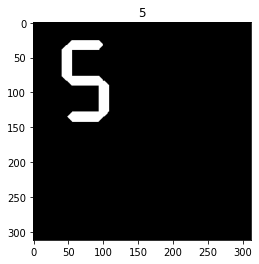

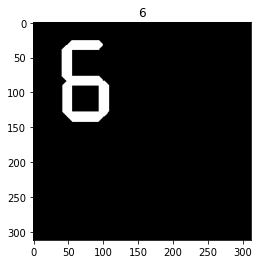

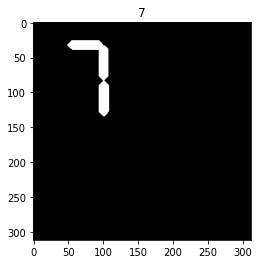

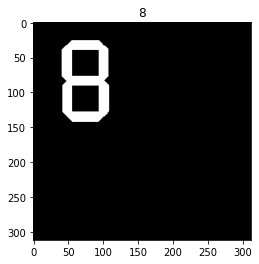

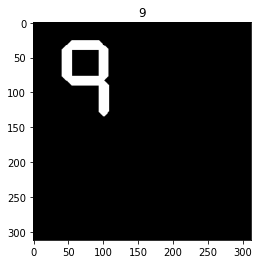

In [105]:
#            0     1     2     3     4     5     6
num_map = [[True, False, True, True, True, True, True], #0
            [False, False, False, False, True, True, False], #1
            [True, True, True, False, False, True, True], #2
            [True, True, False, False, True, True, True], #3
            [False, True, False, True, True, True, False], #4
            [True, True, False, True, True, False, True], #5
            [True, True, True, True, True, False, True], #6
            [False, False, False, False, True, True, True], #7
            [True, True, True, True, True, True, True], #8
            [False, True, False, True, True, True, True], #9
]

numeros = np.array([numero1,numero2,numero3])

for i in range(10):
    num = numeros[0][num_map[i]].sum(axis=0).astype(np.uint8)
    print_img(num, str(i))

In [120]:
contador = 0

for i in range(10): #num1
    print(i)
    for j in range(10): #num2
        for k in range(10): #num3
            for l in range(2): #num4
                for m in range(2): #menos
                    img = frame.copy()
                    img += numeros[0][num_map[i]].sum(axis=0)
                    img += numeros[1][num_map[j]].sum(axis=0)
                    img += numeros[2][num_map[k]].sum(axis=0)

                    if m == 0:
                        img += menos
                    if l == 0:
                        img += numero4

                    path = "Export/img"
                    path += "_"+str(i)
                    path += str(j)
                    
                    path += "_"

                    if m == 0:
                        path += "-"
                    if l == 0:
                        path += "1"
                    
                    path += str(k)
                    path += ".png"

                    cv.imwrite(path, img, [cv.IMWRITE_PNG_COMPRESSION, 9])
                    
                    #print(path)
                    #print_img(img)                    
                    #if contador == 10:
                    #    raise Exception()
                    #contador += 1
                    

0
1
2
3
4
5
6
7
8
9


In [1]:
import json

label_file = open("LabelConfig.json")
labels = json.load(label_file)
label_file.close()

labels

{'m_LabelEntries': [{'label': 'Base', 'id': 1},
  {'label': 'Equipamento', 'id': 2},
  {'label': 'EquipamentoA', 'id': 3},
  {'label': 'EquipamentoB', 'id': 4},
  {'label': 'EquipamentoC', 'id': 5},
  {'label': 'EquipamentoD', 'id': 6},
  {'label': 'EquipamentoE', 'id': 7},
  {'label': 'Mostrador', 'id': 8},
  {'label': 'Mostrador_0_-10', 'id': 9},
  {'label': 'Mostrador_0_10', 'id': 10},
  {'label': 'Mostrador_0_-0', 'id': 11},
  {'label': 'Mostrador_0_0', 'id': 12},
  {'label': 'Mostrador_0_-11', 'id': 13},
  {'label': 'Mostrador_0_11', 'id': 14},
  {'label': 'Mostrador_0_-1', 'id': 15},
  {'label': 'Mostrador_0_1', 'id': 16},
  {'label': 'Mostrador_0_-12', 'id': 17},
  {'label': 'Mostrador_0_12', 'id': 18},
  {'label': 'Mostrador_0_-2', 'id': 19},
  {'label': 'Mostrador_0_2', 'id': 20},
  {'label': 'Mostrador_0_-13', 'id': 21},
  {'label': 'Mostrador_0_13', 'id': 22},
  {'label': 'Mostrador_0_-3', 'id': 23},
  {'label': 'Mostrador_0_3', 'id': 24},
  {'label': 'Mostrador_0_-14', 'id'

In [9]:
max_id = 0

for label in labels["m_LabelEntries"]:
    if label["id"] > max_id:
        max_id = label["id"]
    
max_id

8

In [8]:
max_id = 8
labels = {"m_LabelEntries":[]}

for i in range(10): #num1
    print(i)
    for j in range(10): #num2
        for k in range(10): #num3
            for l in range(2): #num4
                for m in range(2): #menos            

                    name = str(i)
                    name += str(j)
                    
                    name += "_"

                    if m == 0:
                        name += "-"
                    if l == 0:
                        name += "1"
                    
                    name += str(k)
                    
                    label = "Mostrador_"+name
                    label_id = max_id+1

                    label_dict = {}
                    label_dict["label"] = label
                    label_dict["id"] = label_id

                    labels["m_LabelEntries"].append(label_dict)

                    max_id += 1

labels

0
1
2
3
4
5
6
7
8
9


{'m_LabelEntries': [{'label': 'Mostrador_00_-10', 'id': 9},
  {'label': 'Mostrador_00_10', 'id': 10},
  {'label': 'Mostrador_00_-0', 'id': 11},
  {'label': 'Mostrador_00_0', 'id': 12},
  {'label': 'Mostrador_00_-11', 'id': 13},
  {'label': 'Mostrador_00_11', 'id': 14},
  {'label': 'Mostrador_00_-1', 'id': 15},
  {'label': 'Mostrador_00_1', 'id': 16},
  {'label': 'Mostrador_00_-12', 'id': 17},
  {'label': 'Mostrador_00_12', 'id': 18},
  {'label': 'Mostrador_00_-2', 'id': 19},
  {'label': 'Mostrador_00_2', 'id': 20},
  {'label': 'Mostrador_00_-13', 'id': 21},
  {'label': 'Mostrador_00_13', 'id': 22},
  {'label': 'Mostrador_00_-3', 'id': 23},
  {'label': 'Mostrador_00_3', 'id': 24},
  {'label': 'Mostrador_00_-14', 'id': 25},
  {'label': 'Mostrador_00_14', 'id': 26},
  {'label': 'Mostrador_00_-4', 'id': 27},
  {'label': 'Mostrador_00_4', 'id': 28},
  {'label': 'Mostrador_00_-15', 'id': 29},
  {'label': 'Mostrador_00_15', 'id': 30},
  {'label': 'Mostrador_00_-5', 'id': 31},
  {'label': 'Mos

In [13]:
label_file = open("LabelConfig.json", "w")
json.dump(labels, label_file)
label_file.close()

In [9]:
import yaml

label_file = open("Teste2.asset", "w")
yaml.dump(labels, label_file)
label_file.close()